# Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
J_DAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [2]:
#full_df = pd.read_pickle('full.pkl')
full_hour_df = pd.read_pickle('hour.pkl')
full_day_df = pd.read_pickle('day.pkl')
id_df = pd.read_pickle('id.pkl')

In [3]:
full_hour_df.head(1)

,total,id,count_reg,city,month,day,weekday,weekday_name,week,year,hour,consumption,ts,temperature,r_humidity,heat_index
0,199.341003,702552276,11,מודיעין מכבים רעות,1,1,5,Saturday,52,2022,0,5.037,2022-01-01,10.7,81.0,10.7


In [4]:
full_day_df.head(1)

,id,count_reg,city,month,day,weekday,weekday_name,week,year,total,temperature,r_humidity,heat_index
0,702552276,11,מודיעין מכבים רעות,1,1,5,Saturday,52,2022,199.341003,9.8875,84.25,9.8875


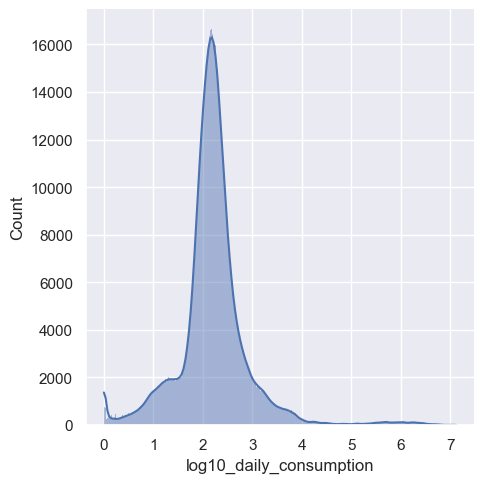

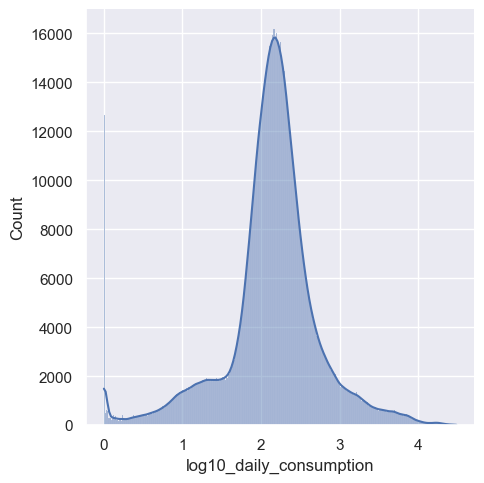

In [5]:
full_day_df['log10_daily_consumption'] = np.log10(full_day_df.total + 1)
sns.displot(full_day_df.log10_daily_consumption, kde=True)
bad_buildings = set(full_day_df[full_day_df.log10_daily_consumption > 4.5].id.unique())
full_day_df['overconsuming'] = full_day_df.id.map(lambda x: x in bad_buildings)

sns.displot(data=full_day_df[full_day_df.overconsuming == False], x='log10_daily_consumption', kde=True)

<Axes: xlabel='month', ylabel='total'>

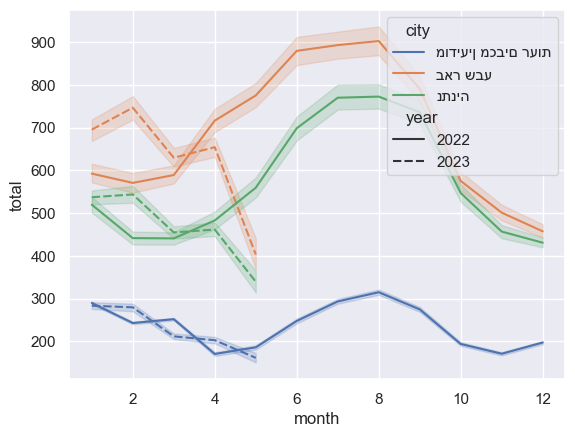

In [6]:
day_df = pd.DataFrame(full_day_df[full_day_df.overconsuming == False])
sns.lineplot(data=day_df, x='month', y='total', hue='city', style='year')
#day_df

In [7]:
day_df = day_df[day_df.year == 2022]
hour_df = pd.DataFrame(full_hour_df[(full_hour_df.id.map(lambda x: x not in bad_buildings)) & (full_hour_df.year == 2022)])

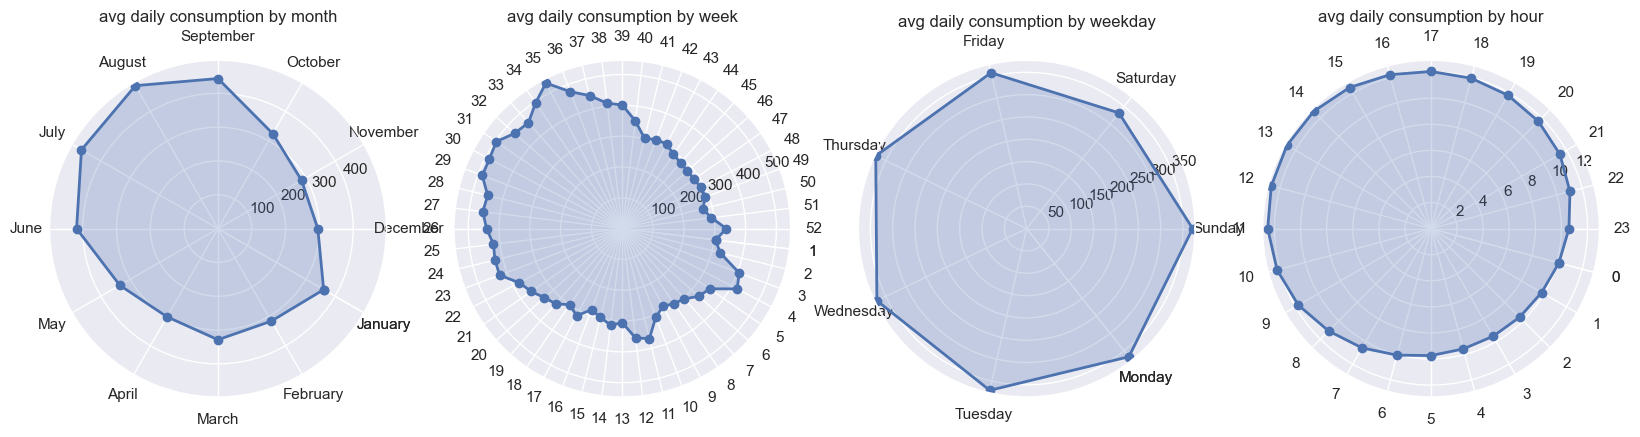

In [8]:

fig, axs = plt.subplots(figsize=(20, 5), nrows=1, ncols=4,
                            subplot_kw=dict(projection='polar'))
def radar_plt(stats, ax, title, labels=None):
    if labels is None:
        labels = np.arange(1, len(stats)+1)
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)[::-1] # Set the angle
    stats=np.concatenate((stats,[stats[0]]))  # Closed
    angles=np.concatenate((angles,[angles[0]]))  # Closed
    ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
    ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, labels[:1])))  # Set the label for each axis
    ax.set_title(title)  # Set the pokemon's name as the title
    #ax.set_rlim(0,250)
    ax.grid(True)


stats=day_df.groupby(day_df.month).mean(numeric_only=True).total.values
radar_plt(stats, axs[0], 'avg daily consumption by month', MONTHS)
stats=day_df.groupby(day_df.week).mean(numeric_only=True).total.values
radar_plt(stats, axs[1], 'avg daily consumption by week')
stats=day_df.groupby(day_df.weekday).mean(numeric_only=True).total.values
radar_plt(stats, axs[2], 'avg daily consumption by weekday', DAYS)
stats=hour_df.groupby(hour_df.hour).mean(numeric_only=True).consumption.values
radar_plt(stats, axs[3], 'avg daily consumption by hour', np.arange(0,24))

[Text(0.5, 1.0, 'consumption')]

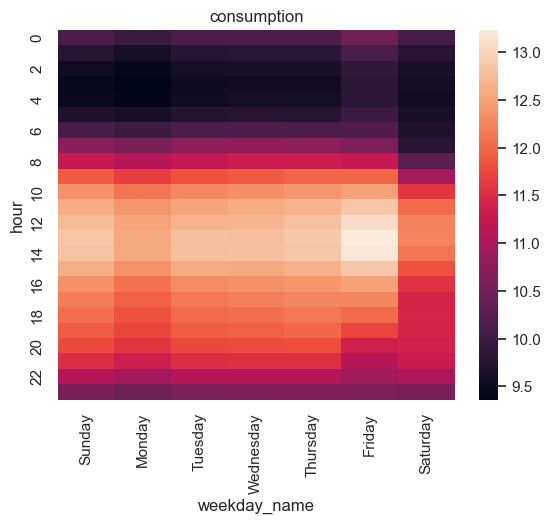

In [9]:
table = hour_df.groupby(['weekday_name', 'hour']).mean(numeric_only=True)['consumption'].reset_index().pivot(columns='weekday_name', index='hour', values='consumption')
sns.heatmap(table).set(title='consumption')

[Text(0.5, 1.0, 'consumption')]

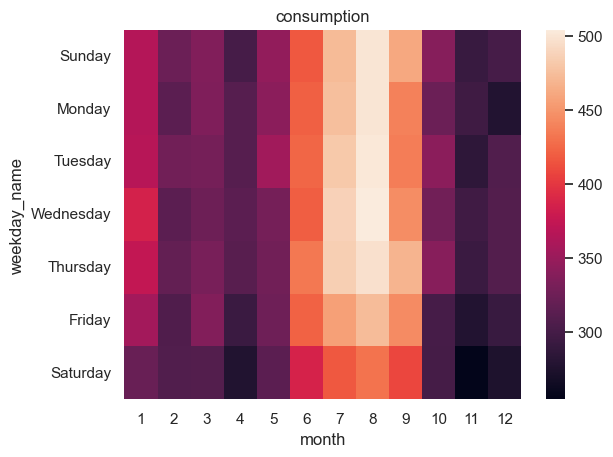

In [10]:
table = day_df.groupby(['weekday_name', 'month']).mean(numeric_only=True)['total'].reset_index().pivot(columns='month', index='weekday_name', values='total')
sns.heatmap(table).set(title='consumption')

<Axes: xlabel='weekday_name', ylabel='total'>

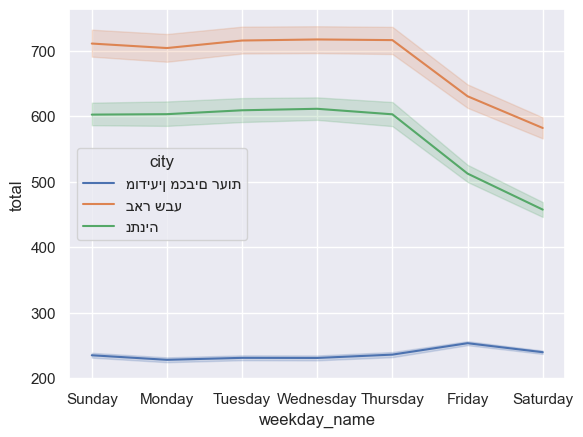

In [11]:
sns.lineplot(data=day_df, x='weekday_name', y='total', hue='city')

<Axes: xlabel='rounded_heat_index', ylabel='total'>

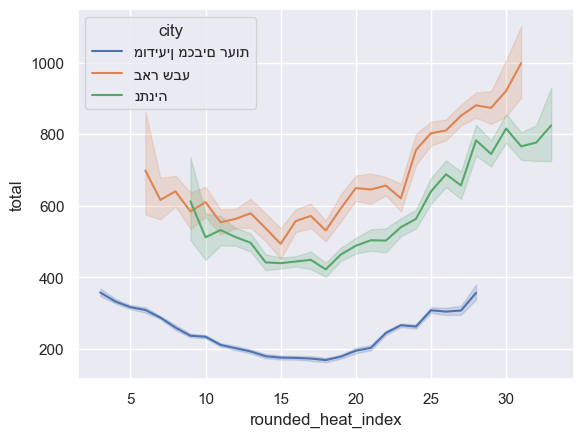

In [12]:
day_df['rounded_heat_index'] = day_df.heat_index.round(0)
sns.lineplot(data=day_df, x='rounded_heat_index', y='total', hue='city')

<Axes: xlabel='count_reg', ylabel='total'>

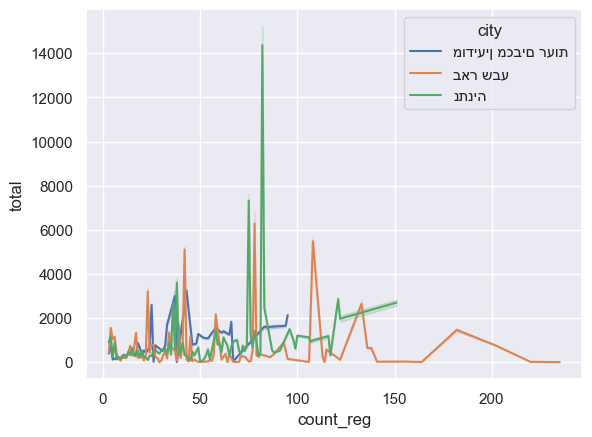

In [13]:
sns.lineplot(data=day_df, x='count_reg', y='total', hue='city')